## ¿Cómo funciona DBSCAN?

- **Eps (`eps`)**: Define la distancia máxima que puede haber entre dos puntos para que se consideren vecinos. Si la distancia entre dos puntos es menor o igual a `eps`, se consideran vecinos.
- **Min_samples (`min_samples`)**: Define el número mínimo de puntos que debe tener un grupo de puntos dentro de un radio `eps` para que se considere un clúster.

## Etapas de DBSCAN en tu código

### Detección de puntos centrales y clústeres

- **Puntos centrales**: Los puntos que tienen al menos `min_samples` vecinos dentro de un radio `eps` se consideran puntos centrales y forman parte de un clúster.
- **Ruido**: Los puntos que no tienen suficientes vecinos (menos de `min_samples`) son etiquetados como ruido y no pertenecen a ningún clúster.

### Puntos centrales utilizados por KNN

- Después de ejecutar **DBSCAN**, los puntos centrales (es decir, los puntos más representativos de cada clúster) son utilizados para entrenar el modelo **KNN**. Estos puntos se encuentran en `dbscan2.components_`.
- Las etiquetas de estos puntos (`dbscan2.labels_[dbscan2.core_sample_indices_]`) son las clases que serán utilizadas por **KNN** para la clasificación supervisada.

## KNN (K-Nearest Neighbors)

KNN es un algoritmo de clasificación supervisado que asigna una clase a un punto nuevo basándose en los **K vecinos más cercanos**. A continuación te explico cómo funciona KNN y cómo lo usas en tu código:

### ¿Cómo funciona KNN?

1. **Entrenamiento con datos etiquetados**: 
   - KNN no tiene una fase de entrenamiento como otros algoritmos. Simplemente almacena los datos y luego clasifica un nuevo punto en función de sus vecinos más cercanos en los datos etiquetados.

2. **Predicción**:
   - Para clasificar un nuevo punto, KNN calcula la **distancia** entre este punto y todos los puntos de entrenamiento (en este caso, los puntos centrales detectados por **DBSCAN**).
   - Selecciona los **K vecinos más cercanos** (en tu caso, `n_neighbors=5` o `n_neighbors=10`).
   - El nuevo punto se clasifica según la **clase predominante** entre los K vecinos más cercanos. Si la mayoría de los vecinos pertenecen a un determinado clúster, el nuevo punto será asignado a ese clúster.

### Etapas de KNN en tu código

#### Entrenamiento de KNN:

- KNN se entrena con los **puntos centrales** de **DBSCAN** (`dbscan2.components_`), que son los puntos que forman parte de los clústeres detectados, y las **etiquetas** de esos puntos (`dbscan2.labels_[dbscan2.core_sample_indices_]`), que indican a qué clúster pertenecen.
- Aquí, el modelo KNN está configurado para buscar los **10 vecinos más cercanos** (`n_neighbors=10`).

#### Clasificación de nuevos puntos:

- En esta etapa, KNN utiliza los puntos centrales de **DBSCAN** para **clasificar los nuevos puntos** (`X_new_tornado`) en uno de los clústeres.
- KNN busca los **10 vecinos más cercanos** entre los puntos centrales y asigna una clase (clúster) basada en la clase predominante de esos vecinos.

In [2]:
from sklearn.datasets import load_wine

# Cargar el dataset de vinos
wine = load_wine()

# Extraer las características (X) y las etiquetas reales (y)
X = wine.data
y = wine.target

# Mostrar las etiquetas reales
print("Etiquetas reales del dataset de vinos:", y)


Etiquetas reales del dataset de vinos: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## Dataset de Vinos (Wine dataset)

El **Wine dataset** tiene como **etiquetas reales** tres clases diferentes de vino, cada una representando un tipo de vino. Estas clases son:

- **Clase 0**: Vino de la clase 1.
- **Clase 1**: Vino de la clase 2.
- **Clase 2**: Vino de la clase 3.

El dataset contiene **13 características químicas** diferentes para cada vino, como el alcohol, el ácido málico, la cantidad de magnesio, entre otras.

### Objetivo

El objetivo es **agrupar estos vinos usando DBSCAN** sin saber de antemano cuántos clústeres hay, aunque las etiquetas reales ya nos indican que son **3 clústeres**.

In [3]:
from sklearn.preprocessing import MinMaxScaler
# Paso 1: Normalizar los datos usando MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

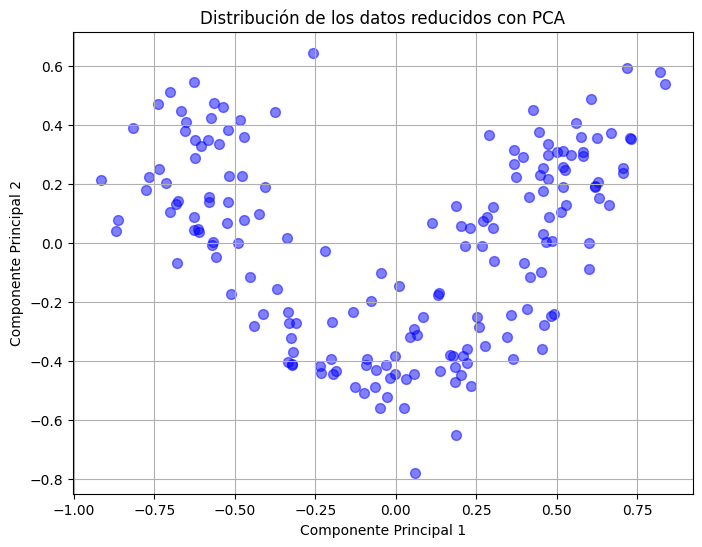

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducir las dimensiones de los datos con PCA a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)  # Usar los datos normalizados

# Graficar la distribución de los datos
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', marker='o', s=50, alpha=0.5)
plt.title("Distribución de los datos reducidos con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()


## Determinar el valor adecuado de `eps` en el algoritmo DBSCAN

El parámetro `eps` define el radio de vecindad dentro del cual **DBSCAN** considera que los puntos son vecinos y pueden formar un clúster.

### 1. Escalar los datos

- `StandardScaler()`: Esta función **normaliza** los datos eliminando la media y escalando la varianza a 1 para cada característica. En otras palabras, ajusta los datos para que cada columna (característica) tenga una **media de 0** y una **desviación estándar de 1**.
- `X_scaled = scaler.fit_transform(X)`: Aplica esta normalización a los datos originales `X`.

### 2. Ajustar Nearest Neighbors para encontrar el valor de `eps`

- `NearestNeighbors(n_neighbors=4)`: Se utiliza el algoritmo **Nearest Neighbors** (Vecinos más cercanos) para encontrar los **4 vecinos más cercanos** de cada punto. El número de vecinos se especifica como 4 en este caso, ya que esto es útil para determinar un valor adecuado de `eps`.

- **¿Por qué 4?**: Se elige el 4º vecino más cercano porque en **DBSCAN**, al menos 4 puntos deben estar dentro del radio `eps` para formar un clúster (aunque este número puede variar según `min_samples`).

- `neighbors_fit = neighbors.fit(X_scaled)`: Ajusta el modelo Nearest Neighbors a los datos escalados `X_scaled`.

- `distances, indices = neighbors_fit.kneighbors(X_scaled)`: Calcula las **distancias** y los **índices** de los 4 vecinos más cercanos para cada punto del dataset.

### 3. Ordenar las distancias para encontrar el "codo" en la curva

- `distances[:, 3]`: Selecciona la columna correspondiente a la **distancia al 4º vecino más cercano**.

- `np.sort(distances[:, 3], axis=0)`: Ordena las distancias del 4º vecino más cercano en orden ascendente.


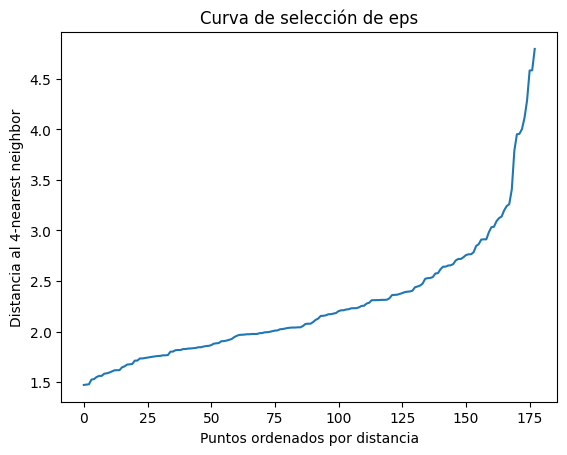

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajustar NearestNeighbors para encontrar el valor de eps
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Ordenar las distancias (de menor a mayor) para encontrar el "codo"
distances = np.sort(distances[:, 3], axis=0)

# Graficar las distancias de los 4-Nearest Neighbors
plt.plot(distances)
plt.title("Curva de selección de eps")
plt.xlabel("Puntos ordenados por distancia")
plt.ylabel("Distancia al 4-nearest neighbor")
plt.show()


## Curva para seleccionar el valor adecuado de `eps` en DBSCAN

Esta curva es útil para seleccionar un valor adecuado de `eps` en el algoritmo **DBSCAN**, observando el punto donde la distancia comienza a aumentar significativamente, lo que se conoce como el "codo" en la gráfica.

### Análisis de la gráfica:

- **Eje Y (Distancia al 4-nearest neighbor)**:
  - Muestra la **distancia** entre cada punto y su 4º vecino más cercano. Los valores más bajos indican que los puntos están más densamente agrupados, mientras que los valores más altos indican que los puntos están más dispersos o aislados.

- **Eje X (Puntos ordenados por distancia)**:
  - Cada punto en el eje X representa un punto del dataset, ordenado por la **distancia a su 4-nearest neighbor** (del más cercano al más lejano).

### Codo en la curva:

El "codo" de la curva aparece alrededor de la distancia **2.5**, aproximadamente entre los puntos **125-150**. Este es el punto donde la pendiente de la curva cambia de manera notable, lo que indica que la mayoría de los puntos están dentro de una cierta distancia de sus vecinos, pero después de este punto, las distancias comienzan a aumentar más rápidamente.

### Elección de `eps`:

Dado que el "codo" aparece alrededor de **2.5**, este es un buen valor inicial para `eps`. Puedes probar con `eps = 2.5` en tu modelo **DBSCAN**.

## Parámetros clave de DBSCAN

- **`eps`**: Es el **radio de vecindad** en el que **DBSCAN** busca puntos cercanos para formar clústeres. Define qué tan cerca deben estar los puntos para ser considerados vecinos.

- **`min_samples`**: Es el **número mínimo de puntos** (incluyendo el punto central) que deben estar dentro del radio `eps` para que un punto sea considerado parte de un clúster.

- **`fit`**: Es el método que **entrena el modelo** usando los datos proporcionados. En el caso de **DBSCAN**, el método `fit` identifica los clústeres en los datos aplicando el algoritmo con los parámetros definidos (como `eps` y `min_samples`).

### Aplicación del algoritmo

El código aplica **DBSCAN** dos veces, con diferentes valores de `eps` y `min_samples`, para ver cómo cambian los clústeres formados y el número de puntos considerados como ruido. Esto es útil para encontrar la configuración más adecuada de parámetros que mejor se ajuste a los datos.

- **Con `eps=2.1` y `min_samples=5`**: Se forma una cierta cantidad de clústeres, y probablemente algunos puntos sean etiquetados como ruido.

- **Con `eps=2.4` y `min_samples=6`**: Al aumentar el radio y el número mínimo de vecinos, el número de clústeres podría cambiar, y puede haber menos puntos marcados como ruido.


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Paso 1: Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_normalized)

# Paso 2: Aplicar DBSCAN con eps=0.05
dbscan = DBSCAN(eps=2.1, min_samples=5)
dbscan.fit(X_scaled)

# Ver las etiquetas obtenidas en el primer modelo DBSCAN
print("Etiquetas con eps=2.1:", np.unique(dbscan.labels_))

# Paso 3: Aplicar DBSCAN con eps=0.2
dbscan2 = DBSCAN(eps=2.4, min_samples=6)
dbscan2.fit(X_scaled)

# Ver las etiquetas obtenidas en el segundo modelo DBSCAN
print("Etiquetas con eps=2.4:", np.unique(dbscan2.labels_))


Etiquetas con eps=2.1: [-1  0  1  2]
Etiquetas con eps=2.4: [-1  0  1]


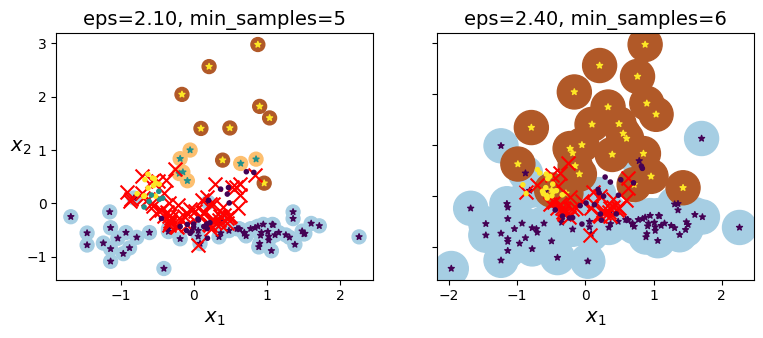

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Función para graficar los resultados de DBSCAN
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

# Reducir las dimensiones de los datos con PCA a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)  # Utilizar los datos normalizados que tienes

# Graficar los resultados de DBSCAN
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X_pca, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X_pca, size=600, show_ylabels=False)

plt.show()

Las equis rojas son consideradas como muestras fuera de los grupos como anomalías

## Comparación de DBSCAN con diferentes valores de `eps` y `min_samples`

### Con `eps=2.10` y `min_samples=5`:

- **DBSCAN** es más estricto, detectando **tres clústeres** (0, 1, 2) con un número considerable de puntos etiquetados como **ruido** (-1).
- La **separación de los clústeres** es más detallada, lo que indica que DBSCAN es más sensible a las pequeñas diferencias entre los puntos.

### Con `eps=2.40` y `min_samples=6`:

- **DBSCAN** agrupa más puntos y reduce el número de clústeres a **dos** (0 y 1), pero genera menos puntos marcados como **ruido** en comparación con el caso anterior.
- El clúster identificado como 2 en la gráfica izquierda ha sido **absorbido** por los otros clústeres, lo que sugiere que el valor más alto de `eps` ha hecho que DBSCAN sea **menos sensible** a las pequeñas diferencias entre grupos de puntos.


## Uso de K-Nearest Neighbors (KNN) para predecir etiquetas de nuevos puntos con PCA

### 1. Reducción a 2 dimensiones:
- Se utiliza **PCA** para reducir los **puntos centrales** de DBSCAN a **2 dimensiones**.

### 2. Entrenamiento de KNN:
- Se entrena un modelo **KNN** con los puntos centrales reducidos, utilizando los **10 vecinos más cercanos**.

### 3. Selección de puntos nuevos:
- Se seleccionan **10 filas aleatorias** del dataset normalizado.

### 4. Reducción de los nuevos puntos:
- Se aplica **PCA** a los puntos seleccionados para reducirlos a **2 dimensiones**.

### 5. Predicción de etiquetas:
- Se utiliza el modelo **KNN** para predecir a qué **clúster** pertenecen los nuevos puntos.

### 6. Probabilidades de pertenencia:
- Se calculan las **probabilidades de pertenencia** a cada clúster para los nuevos puntos.


In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Paso 1: Reducir los puntos centrales de DBSCAN a 2 dimensiones usando PCA
pca = PCA(n_components=2)
X_components_pca = pca.fit_transform(dbscan.components_)  # Puntos centrales en 2D

# Paso 2: Entrenar el modelo KNN con los puntos centrales en 2 dimensiones
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_components_pca, dbscan.labels_[dbscan.core_sample_indices_])

# Paso 3: Nuevos puntos a predecir (con las características originales)
# Seleccionar 10 filas aleatorias del dataset normalizado
random_indices = np.random.choice(X_normalized.shape[0], size=10, replace=False)
X_new_ = X_normalized[random_indices, :]  # Filas aleatorias

# Paso 4: Reducir los nuevos puntos a 2 dimensiones usando PCA
X_new_pca = pca.transform(X_new_)

# Paso 5: Predecir las etiquetas para los nuevos puntos
predictions = knn.predict(X_new_pca)
print("Predicciones para los nuevos puntos:", predictions)

# Paso 6: Obtener las probabilidades de pertenencia a cada clúster
proba_predictions = knn.predict_proba(X_new_pca)
print("Probabilidades de pertenencia a los clústeres:", proba_predictions)


Predicciones para los nuevos puntos: [0 0 0 0 0 0 0 0 0 0]
Probabilidades de pertenencia a los clústeres: [[1.  0.  0. ]
 [0.9 0.1 0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]]


## Zonas de color:

- Cada **región de color** representa una **zona de decisión de KNN**, donde todos los puntos dentro de esa región serían clasificados en el mismo clúster.
- En este caso, hay **tres regiones de color** (amarillo, azul y púrpura), lo que sugiere **tres posibles clústeres** (0, 1, 2).

## Puntos negros:

- Los **puntos negros** son los puntos de datos del conjunto de entrenamiento, representados en el espacio reducido a 2D por **PCA**.

## Cruces azules:

- Las **cruces azules** son los **nuevos puntos** que el modelo KNN está intentando clasificar.
- Según la gráfica, estos puntos están ubicados en la **región púrpura**, lo que indica que serán clasificados en el mismo clúster que los puntos de esa región.

## Predicciones consistentes:

- Dado que todos los puntos nuevos (**cruces azules**) están dentro de la misma **región púrpura**, se justifica el resultado previo de que todos los nuevos puntos fueron clasificados en el **clúster 0**.


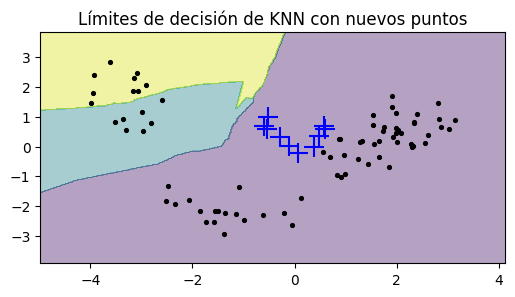

In [13]:
# Paso 7: Función para graficar los límites de decisión de KNN
def plot_decision_boundaries(classifier, X, show_centroids=True):
    h = .02  # Tamaño del paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Poner el resultado en un gráfico de color
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)

    # Mostrar los puntos originales (puntos centrales de DBSCAN en este caso)
    plt.scatter(X[:, 0], X[:, 1], c="k", marker=".", s=30)

# Paso 8: Graficar los límites de decisión y los nuevos puntos
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X_components_pca, show_centroids=False)
plt.scatter(X_new_pca[:, 0], X_new_pca[:, 1], c="b", marker="+", s=200, zorder=10)
plt.title("Límites de decisión de KNN con nuevos puntos")
plt.show()

In [35]:
# Paso 1: Reducir los puntos centrales de DBSCAN a 2 dimensiones usando PCA
pca = PCA(n_components=2)
X_components_pca = pca.fit_transform(dbscan2.components_)  # Puntos centrales en 2D

# Paso 2: Entrenar el modelo KNN con los puntos centrales en 2 dimensiones
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_components_pca, dbscan2.labels_[dbscan2.core_sample_indices_])

# Paso 3: Nuevos puntos a predecir (con las características originales)
# Seleccionar 100 filas aleatorias del dataset normalizado
random_indices = np.random.choice(X_normalized.shape[0], size=10, replace=False)
X_new_ = X_normalized[random_indices, :]  # Filas aleatorias

# Paso 4: Reducir los nuevos puntos a 2 dimensiones usando PCA
X_new_pca = pca.transform(X_new_)

# Paso 5: Predecir las etiquetas para los nuevos puntos
predictions = knn.predict(X_new_pca)
print("Predicciones para los nuevos puntos:", predictions)

# Paso 6: Obtener las probabilidades de pertenencia a cada clúster
proba_predictions = knn.predict_proba(X_new_pca)
print("Probabilidades de pertenencia a los clústeres:", proba_predictions)


Predicciones para los nuevos puntos: [0 0 0 0 0 0 0 0 0 0]
Probabilidades de pertenencia a los clústeres: [[1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.7 0.3]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]]


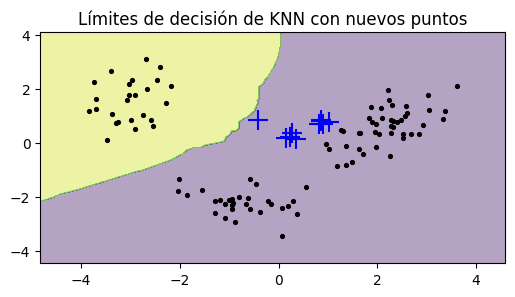

In [36]:
# Paso 8: Graficar los límites de decisión y los nuevos puntos
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X_components_pca, show_centroids=False)
plt.scatter(X_new_pca[:, 0], X_new_pca[:, 1], c="b", marker="+", s=200, zorder=10)
plt.title("Límites de decisión de KNN con nuevos puntos")
plt.show()